In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install -qq -U diffusers transformers ftfy gradio accelerate torch

In [ ]:
!pip install -r /content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/requirements.txt

In [ ]:
!pip install opencv-python-headless PyWavelets PyYAML scikit-image scikit-learn scipy six scikit-learn threadpoolctl tifffile wincertstore

In [ ]:
cd /content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER

/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER


In [ ]:
!pip install --upgrade torchvision>=0.6.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.12 requires torch<2.1,>=1.7, but you have torch 2.1.0 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.1.0 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 2.1.0 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 2.1.0 which is incompatible.


In [ ]:
!bash demo_run.sh

Traceback (most recent call last):
  File "/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/main.py", line 7, in <module>
    from trainer import Trainer, Tester
  File "/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/trainer.py", line 12, in <module>
    from dataloader import get_train_augmentation, get_test_augmentation, get_loader, gt_to_tensor
  File "/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/dataloader.py", line 7, in <module>
    from albumentations.pytorch.transforms import ToTensorV2
  File "/usr/local/lib/python3.10/dist-packages/albumentations/pytorch/__init__.py", line 3, in <module>
    from .transforms import *
  File "/usr/local/lib/python3.10/dist-packages/albumentations/pytorch/transforms.py", line 7, in <module>
    from torchvision.transforms import functional as F
  File "/usr/local/lib/python3.10/dist-packages/torchvision/__init__.py", line 6, in <module>
    from torchvision import datasets, io, models, ops, transforms, uti

In [ ]:
import torch
print(torch.__version__)


2.0.1+cu117


In [ ]:
images = []
pure_file_name = os.path.splitext(os.path.basename(filename))[0]
original_img = mpimg.imread('/content/TRACER/data/custom_dataset/'+filename)
result_alpha = mpimg.imread('/content/TRACER/mask/custom_dataset/'+pure_file_name+'.png',0)
result_color = mpimg.imread('/content/TRACER/object/custom_dataset/'+pure_file_name+'.png')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 20))
ax[0].imshow(original_img)
ax[1].imshow(result_alpha, cmap='gray')
ax[2].imshow(result_color)
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch

import PIL
import gradio as gr
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
input_img_url = "/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/data/custom_dataset/photographers-1.png"
mask_img_url = "/content/drive/MyDrive/TRACERcombineBlendedDiffusion/TRACER/mask/custom_dataset/mask.png"

In [ ]:
device = "cuda"
model_path = "stabilityai/stable-diffusion-2-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float32,
)

vae/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
import cv2

mask_img = cv2.imread("/content/TRACER/mask/custom_dataset/mask.png")
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)
plt.imshow(mask_img)
plt.show()

error: ignored

In [ ]:
width, height = 512, 512
mask_resized = cv2.resize(mask_img, (width, height))

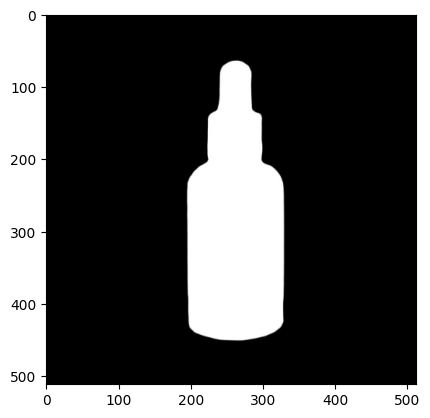

In [ ]:
plt.imshow(mask_resized)
plt.show()

In [ ]:
matrix = np.full((512, 512, 3), 255)

In [ ]:
mask_convert = np.abs(mask_resized - matrix)

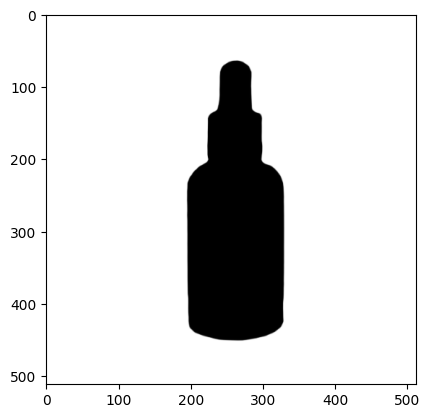

In [ ]:
plt.imshow(mask_convert)
plt.show()

In [ ]:
cv2.imwrite('/content/TRACER/mask_convert/mask_convert.png',mask_convert)

True

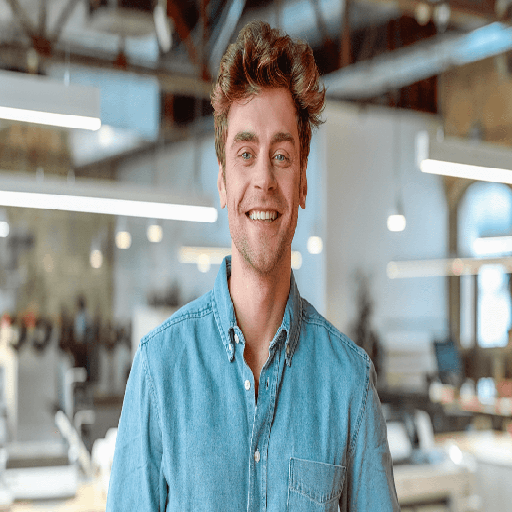

In [ ]:
from PIL import Image

img = Image.open("/content/input.png")
img = img.resize((512, 512))
img

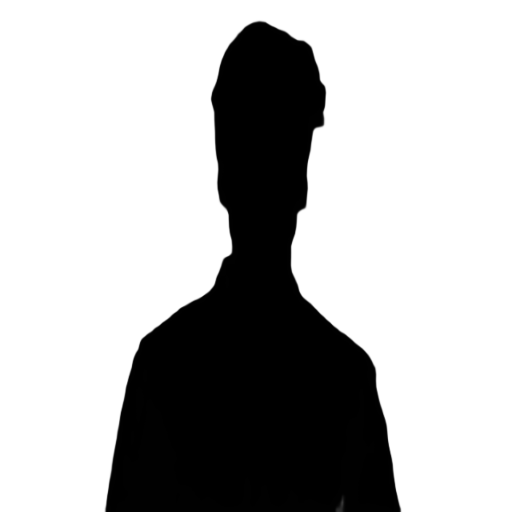

In [ ]:
mask = Image.open("/content/mask.png")
mask = mask.resize((512, 512))
mask

In [ ]:
prompt = "in the beach"

guidance_scale=7.5
num_samples = 3

images = pipe(
    prompt=prompt,
    image=img,
    mask_image=mask,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_samples,
).images

RuntimeError: ignored

In [ ]:
# insert initial image in the list so we can compare side by side
images.insert(0, img)

In [ ]:
import requests
from io import BytesIO

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

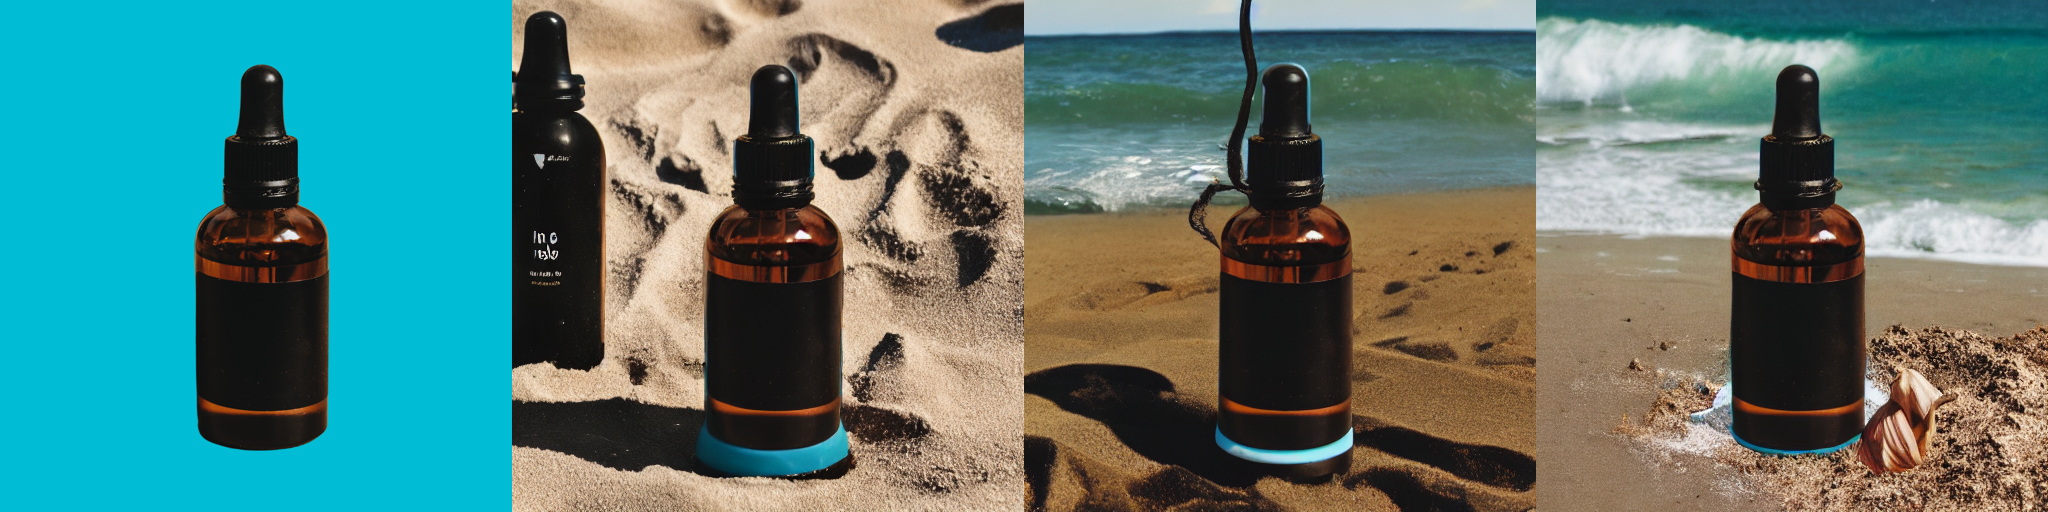

In [ ]:
image_grid(images, 1, num_samples + 1)

In [ ]:
!git clone https://github.com/runwayml/stable-diffusion.git

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 385 (delta 69), reused 61 (delta 61), pack-reused 294
Receiving objects: 100% (385/385), 47.61 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (162/162), done.


In [ ]:
!pip install transformers==4.19.2 diffusers invisible-watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.3
    Uninstalling transformers-4.33.3:
      Successfully uninstalled transformers-4.33.3


In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

In [ ]:
from diffusers import StableDiffusionPipeline

device = "cuda"
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import PIL.Image

pipe = StableDiffusionInpaintPipeline.from_pretrained(
  "stabilityai/stable-diffusion-2-inpainting",
  torch_dtype=torch.float16,
)
pipe.to("cuda")
prompt = "Face of a yellow cat, high resolution, sitting on a park bench"

# Load the image and mask image as PIL images.
image = PIL.Image.open(input_img_url)
mask_image = PIL.Image.open(mask_img_url)

# Inpaint the image.
image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

# Save the generated image.
image.save("./yellow_cat_on_park_bench.png")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

RuntimeError: ignored

(550, 960, 3)


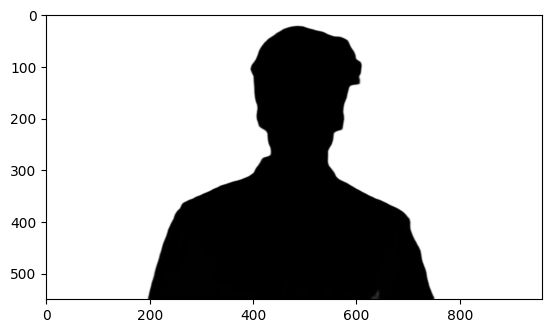

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

mask = cv2.imread("/content/photographers-1.png")
print(mask.shape)
matrix = np.full((550, 960, 3), 255)
mask = np.abs(mask- matrix)

plt.imshow(mask)
plt.show()